# PHYS3112: Coupled Pendula Assignment

## The Equations

From the [prework](prework.pdf), we obtain the following pair of second order ODEs:
$$\begin{align*}
    m L^2 \frac{\mathrm{d}^2 \phi_1}{\mathrm{d} t^2} &= -m g L \sin \phi_1 + k l^2 \cos \phi_1 (\sin \phi_2 - \sin \phi_1) \\
    m L^2 \frac{\mathrm{d}^2 \phi_2}{\mathrm{d} t^2} &= -m g L \sin \phi_2 - k l^2 \cos \phi_2 (\sin \phi_2 - \sin \phi_1)
\end{align*}$$

To convert these to a form numerical integrators like (first order DEs), we make some substitutions:
$$\begin{align*}
    \text{Let } \dot{\phi}_1 &= \frac{\mathrm{d} \phi_1}{\mathrm{d} t} \\
    \dot{\phi}_2 &= \frac{\mathrm{d} \phi_2}{\mathrm{d} t} \\
    \therefore\: \frac{\mathrm{d}^2 \phi_1}{\mathrm{d} t^2} &= \frac{\mathrm{d} \dot{\phi}_1}{\mathrm{d} t} \\
    \frac{\mathrm{d}^2 \phi_2}{\mathrm{d} t^2} &= \frac{\mathrm{d} \dot{\phi}_2}{\mathrm{d} t}
\end{align*}$$

This transforms our ODEs into four first order ODEs:
$$\begin{align*}
    \frac{\mathrm{d} \phi_1}{\mathrm{d} t} &= \dot{\phi}_1 \\
    \frac{\mathrm{d} \phi_2}{\mathrm{d} t} &= \dot{\phi}_2 \\
    \frac{\mathrm{d} \dot{\phi}_1}{\mathrm{d} t} &= \frac{-m g L \sin \phi_1 + k l^2 \cos \phi_1 (\sin \phi_2 - \sin \phi_1)}{m L^2} \\
    \frac{\mathrm{d} \dot{\phi}_2}{\mathrm{d} t} &= \frac{-m g L \sin \phi_2 - k l^2 \cos \phi_2 (\sin \phi_2 - \sin \phi_1)}{m L^2}
\end{align*}$$

For the sake of the basic component of the assignment, we will temporarily take the small angle approximation for $\sin$ and $\cos$:
$$\begin{align*}
    \frac{\mathrm{d} \dot{\phi}_1}{\mathrm{d} t} &= \frac{-m g L \phi_1 + k l^2 (\phi_2 - \phi_1)}{m L^2} \\
    \frac{\mathrm{d} \dot{\phi}_2}{\mathrm{d} t} &= \frac{-m g L \phi_2 - k l^2 (\phi_2 - \phi_1)}{m L^2}
\end{align*}$$

Also from the prework, we know there is an exact solution for the approximation. To keep the equations short, we set the initial conditions to be $\phi_1 = {\phi_1}_0$, $\phi_2 = {\phi_2}_0$ and $\dot{\phi}_1 = \dot{\phi}_2 = 0$:
$$\begin{align*}
    \phi_1 &= \frac{1}{2} \left(({\phi_1}_0 - {\phi_2}_0) \cos \omega_1 t + ({\phi_1}_0 + {\phi_2}_0) \cos \omega_2 t\right) \\
    \phi_2 &= \frac{1}{2} \left(({\phi_2}_0 - {\phi_1}_0) \cos \omega_1 t + ({\phi_1}_0 + {\phi_2}_0) \cos \omega_2 t\right) \\
    \text{Where }
    \omega_1 &= 2 \pi f_1 = \frac{\sqrt{g L + \frac{2 k l^2}{m}}}{L} \\
    \omega_2 &= 2 \pi f_2 = \sqrt{\frac{g}{L}}
\end{align*}$$

## The Constants
We will be using the values from the [lab report](lab.pdf) for our constants. Specifically, they will be as follows:
$$\begin{align*}
g &= 9.797 \:\mathrm{m \cdot s^{-2}} \\
k &= 3.106 \:\mathrm{N \cdot m^{-1}} \\
L &= 0.965 \:\mathrm{m} \\
m &= 1.105 \:\mathrm{kg}
\end{align*}$$

We also need a sample rate and length of our measurements. For reasons that will be evident later, we will set the sample rate to $10 \:\mathrm{Hz}$. For a good frequency resolution, we will be taking measurements for $4000 \:\mathrm{s}$.

In [1]:
g = 9.797
k = 3.106
L = 0.965
m = 1.105

sampleRate = 10
tEnd = 4000

## The Functions
Let us define three python functions:
 - `f(y, t)`, which returns the unapproximated DEs where `y` is $\left(\phi_1, \phi_2, \dot{\phi}_1, \dot{\phi}_2\right)$
 - `fApprox(y, t)`, which returns the approximated DEs where `y` is $\left(\phi_1, \phi_2, \dot{\phi}_1, \dot{\phi}_2\right)$
 - `fApproxExact(phi0, t)`, which returns the exact solutions to the approximated DEs where `phi0` is $\left({\phi_1}_0, {\phi_2}_0\right)$

In [2]:
import math

def f(y, t):
    """
        y[0] = φ_1
        y[1] = φ_2
        y[2] = D[φ_1, t]
        y[3] = D[φ_2, t]
    """
    return (
        y[2], y[3],
        (k * l ** 2 * math.cos(y[0]) * (math.sin(y[1]) - math.sin(y[0])) - m * g * L * math.sin(y[0])) / (m * L ** 2),
        (-k * l ** 2 * math.cos(y[1]) * (math.sin(y[1]) - math.sin(y[0])) - m * g * L * math.sin(y[1])) / (m * L ** 2)
    );

def fApprox(y, t):
    """
        y[0] = φ_1
        y[1] = φ_2
        y[2] = D[φ_1, t]
        y[3] = D[φ_2, t]
    """
    return (
        y[2], y[3],
        (k * l ** 2 * (y[1] - y[0]) - m * g * L * y[0]) / (m * L ** 2),
        (-k * l ** 2 * (y[1] - y[0]) - m * g * L * y[1]) / (m * L ** 2)
    );

def fApproxExact(phi0, t):
    omega1 = math.sqrt(g * L + 2 * k * l**2 / m) / L
    omega2 = math.sqrt(g / L)
    return (
        1 / 2 * ((phi0[0] - phi0[1]) * math.cos(omega1 * t) + (phi0[0] + phi0[1]) * math.cos(omega2 * t)),
        1 / 2 * ((phi0[1] - phi0[0]) * math.cos(omega1 * t) + (phi0[0] + phi0[1]) * math.cos(omega2 * t))
    );

## The Solutions

### Comparing to the Experimental Results
For now, let us consider the case where ${\phi_1}_0 = \frac{\pi}{20}$ and ${\phi_2}_0 = 0$ at a couple length of $l = 0.4 \:\mathrm{m}$. Experimentally, this produced a beating oscillation mode with two fundamental frequencies: $f_1 = 529 \:\mathrm{mHz}$ and $f_2 = 507 \:\mathrm{mHz}$

What does our theoretical solutions look like? Note we set the relative and absolute tolerance of our integrator to $0$ and $10^{-10}$, respectively, for reasons that will be evident later.

Our solutions will be stored in `y`, `yApprox` and `yApproxExact`, which hold the solutions corresponding to the functions `f`, `fApprox` and `fApproxExact` as defined above.

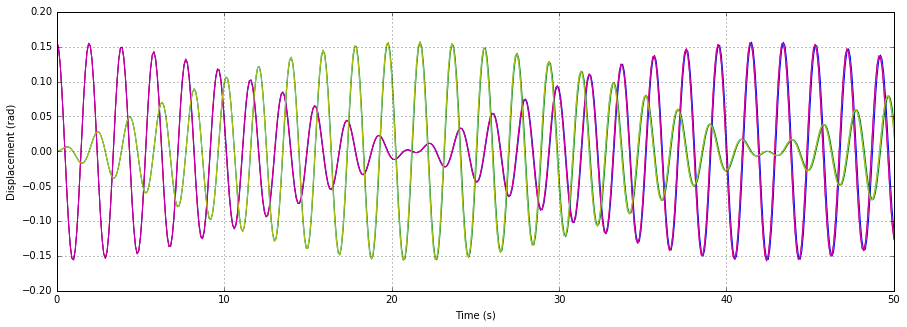

In [3]:
import matplotlib.pyplot as plot
import numpy
import scipy.constants, scipy.integrate
plot.rcParams["figure.figsize"] = (15, 5)

l = 0.4
phi0 = (scipy.constants.pi / 20, 0)

t = numpy.arange(0, tEnd, 1 / sampleRate)
y = [(y[0], y[1]) for y in scipy.integrate.odeint(f, phi0 + (0, 0), t, rtol = 0, atol = 1e-12)]
yApprox = [(y[0], y[1]) for y in scipy.integrate.odeint(fApprox, phi0 + (0, 0), t, rtol = 0, atol = 1e-12)]
yApproxExact = [fApproxExact(phi0, t_) for t_ in t];

plot.plot(t, y)
plot.plot(t, yApprox)
plot.plot(t, yApproxExact)
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 50))
plot.grid()
plot.show()

As you can see, there are two distinct sets of lines in the above graph, with each corresponding to a pendulum. The beating behaviour is also very clear, as expected.

However, note that in the code we actually plot 6 distinct lines, not 2, with each pair corresponding to one of the functions defined above. The fact that this only produces 2 distinct lines in the plot indicates that the three functions agree to quite a decent extent.

Though look carefully to the right side of the above plot. Note how the lines seem to become ever so slightly wider and change colour? This is actually the lines diverging from each other, but which functions are diverging from each other and to what extent? To find out, let's plot the relative errors between the functions:

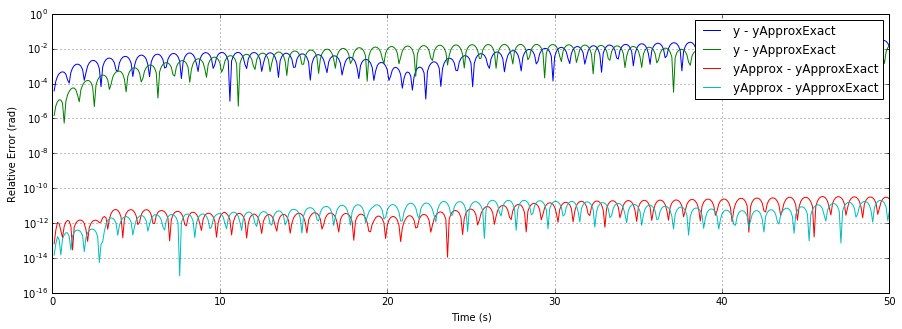

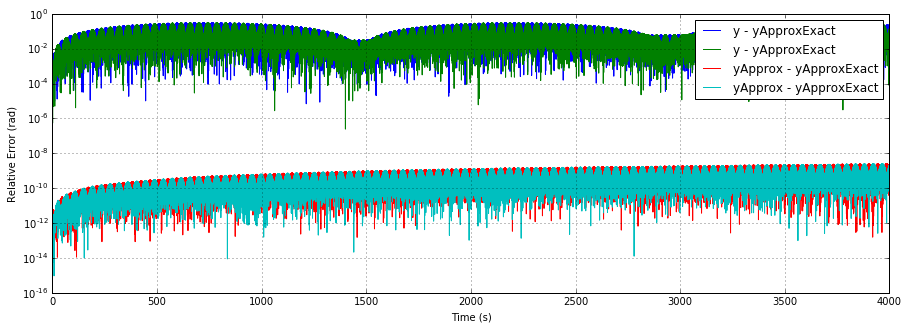

In [4]:
plot.semilogy(t, numpy.abs(numpy.subtract(y, yApproxExact)), label = "y - yApproxExact")
plot.semilogy(t, numpy.abs(numpy.subtract(yApprox, yApproxExact)), label = "yApprox - yApproxExact")
plot.xlabel("Time (s)")
plot.ylabel("Relative Error (rad)")
plot.xlim((0, 50))
plot.grid()
plot.legend()
plot.show()

plot.semilogy(t, numpy.abs(numpy.subtract(y, yApproxExact)), label = "y - yApproxExact")
plot.semilogy(t, numpy.abs(numpy.subtract(yApprox, yApproxExact)), label = "yApprox - yApproxExact")
plot.xlabel("Time (s)")
plot.ylabel("Relative Error (rad)")
plot.grid()
plot.legend()
plot.show()

From the above plots, we can see that `yApprox` and `yApproxExact` agree to within $10^{-8}$. We would expect them to agree exactly, but our numerical integrator has finite accuracy limits, and hence diverge slightly.

If we look at the error between `y` and `yApproxExact`, however, we see it is clearly separated (with greater error) from `yApprox - yApproxExact`, with error on the order of $10^{-1}$. In fact, `yApprox - yApproxExact` would get further and further away from `y - yApproxExact` as error tolerance in our integrator is decreased. Once again, this is completely expected since `y` does not use the small angle approximation that `yApprox` and `yApproxExact` uses. This becomes much more evident as the angles are increased, as we will see later.

Let us now investigate the frequency content of these waveforms. We will use the Blackman window to minimise spectral leakage far from the fundamental frequencies. We will also no longer use `yApprox`, instead opting to use the more accurate `yApproxExact`, since the difference between the two is negligible as demonstrated above.

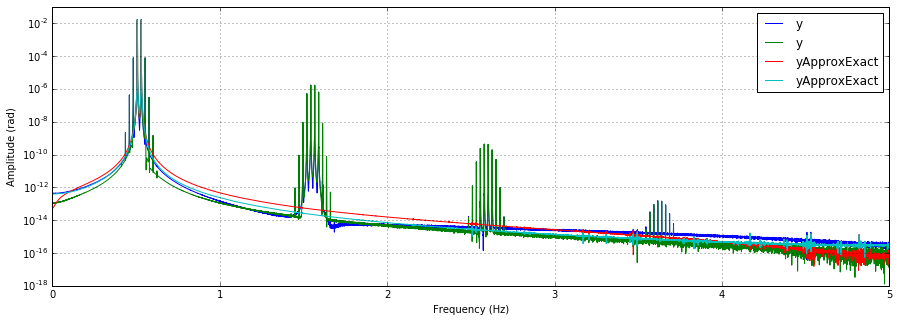

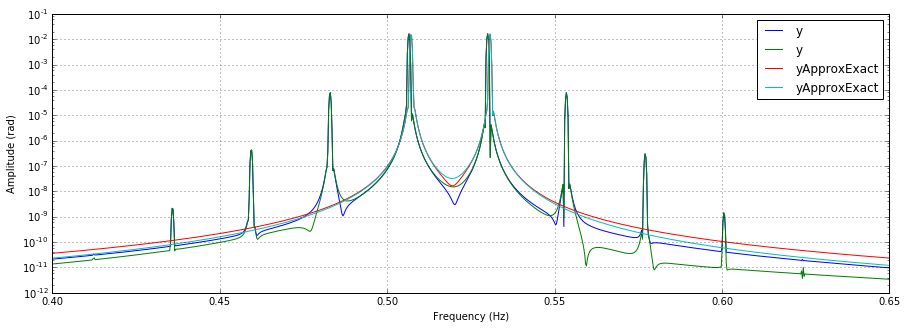

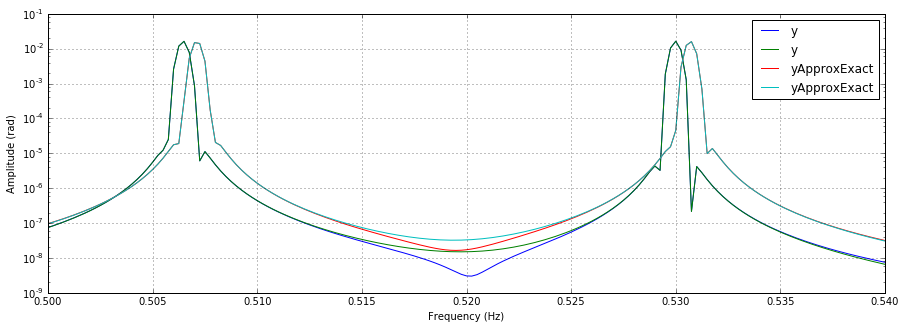

In [5]:
import scipy.fftpack, scipy.signal

def fft(y):
    return numpy.abs(list(zip(
        scipy.fftpack.fft(numpy.multiply(scipy.signal.blackman(len(t)), [y_[0] for y_ in y])),
        scipy.fftpack.fft(numpy.multiply(scipy.signal.blackman(len(t)), [y_[1] for y_ in y]))
    )))[0:len(y) // 2] / len(y)

freq = scipy.fftpack.fftfreq(len(t), 1 / sampleRate)[0:len(t) // 2]
yFft = fft(y)
yApproxFft = fft(yApprox)
yApproxExactFft = fft(yApproxExact)

plot.semilogy(freq, yFft, label = "y")
plot.semilogy(freq, yApproxExactFft, label = "yApproxExact")
plot.xlabel("Frequency (Hz)")
plot.ylabel("Amplitude (rad)")
plot.grid()
plot.legend()
plot.show()

plot.semilogy(freq, yFft, label = "y")
plot.semilogy(freq, yApproxExactFft, label = "yApproxExact")
plot.xlabel("Frequency (Hz)")
plot.ylabel("Amplitude (rad)")
plot.xlim((0.40, 0.65))
plot.ylim((1e-12, 1e-1))
plot.grid()
plot.legend()
plot.show()

plot.semilogy(freq, yFft, label = "y")
plot.semilogy(freq, yApproxExactFft, label = "yApproxExact")
plot.xlabel("Frequency (Hz)")
plot.ylabel("Amplitude (rad)")
plot.xlim((0.50, 0.54))
plot.ylim((1e-9, 1e-1))
plot.grid()
plot.legend()
plot.show()

From the above, we observe that the two pendula in the same experiment oscillates almost at the exact same frequencies as each other, with the only difference being away from the maxima. This difference is also more likely due to the effects of windowing the signal than being inherent in the signal.

Also note that towards the tail end of the spectrum, it becomes "fuzzy". This is due to the numerical accuracy limits to the fourier transform, since even our exact `yApproxExact` solution becomes fuzzy (when it clearly shouldn't with infinite accuracy).

Now for the important difference between the spectra of `y` and `yApproxExact`. Note that `yApproxExact`'s spectrum only has two peaks, corresponding to $f_1 = 531 \:\mathrm{mHz}$ and $f_2 = 507 \:\mathrm{mHz}$ (as defined above), as expected. However, `y` has numerous peaks (and in fact, probably an infinite number that exists below the spectral leakage and noise floor), indicating it is not sinusoidal despite appearing that way. Looking towards its two largest peaks, we can see they are very close to those in the approximated solution, but slightly lower in frequency of $530 \:\mathrm{mHz}$ and $506 \:\mathrm{mHz}$.

Both `y`'s and `yApproxExact`'s frequencies (at least the two of largest amplitude) are within the original error bounds of the experimental results (not shown in this notebook, but are in the [lab report](lab.pdf)), however, so it is difficult to say which is closer to the "real" solution. Repeating the frequency analysis for the other couple lengths gives the same conclusion (once again, not shown here for brevity, but see the lab report), so all we can say is that both `y` and `yApproxExact` model the real experiment reasonably well.

### Larger Angles
We created `fApprox` and `fApproxExact` from the small angle approximation of `f`, so we would expect the solutions to diverge at larger angles. But just how much do they diverge? Let's investigate with ${\phi_1}_0 = \frac{3 \pi}{4}$ being the only difference to the previous section:

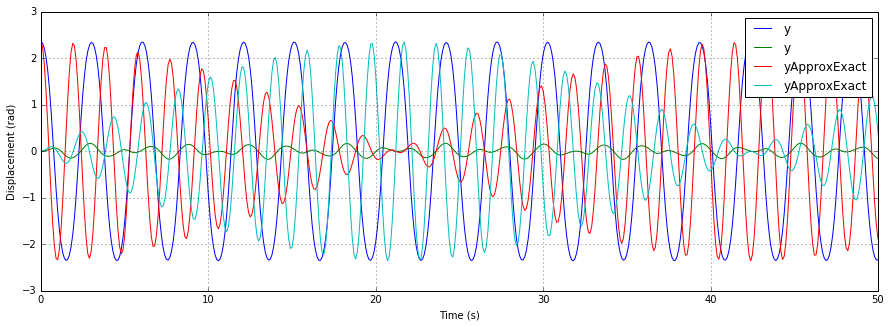

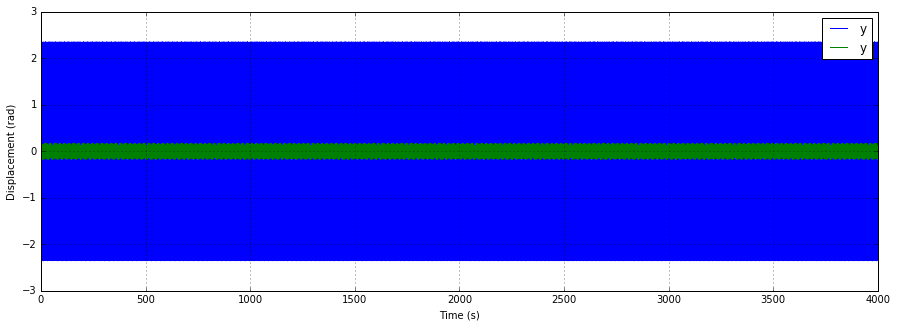

In [6]:
phi0 = (3 * scipy.constants.pi / 4, 0)

y = [(y[0], y[1]) for y in scipy.integrate.odeint(f, phi0 + (0, 0), t, rtol = 0, atol = 1e-12)]
yApproxExact = [fApproxExact(phi0, t_) for t_ in t];

plot.plot(t, y, label = "y")
plot.plot(t, yApproxExact, label = "yApproxExact")
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 50))
plot.grid()
plot.legend()
plot.show()

plot.plot(t, y, label = "y")
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.grid()
plot.legend()
plot.show()

We can see that `y` diverges quite significantly from `yApproxExact`. `y` no longer exhibits the beating behaviour, with one pendulum having a consistently and significantly larger amplitute than the other. The oscillations are also of lower frequency, but lets have a look at that in more detail:

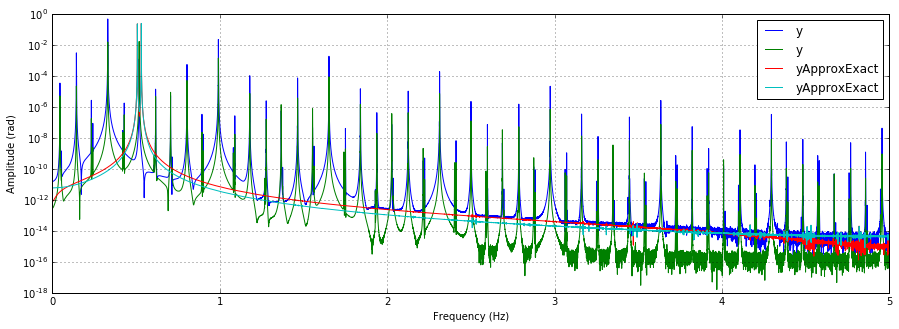

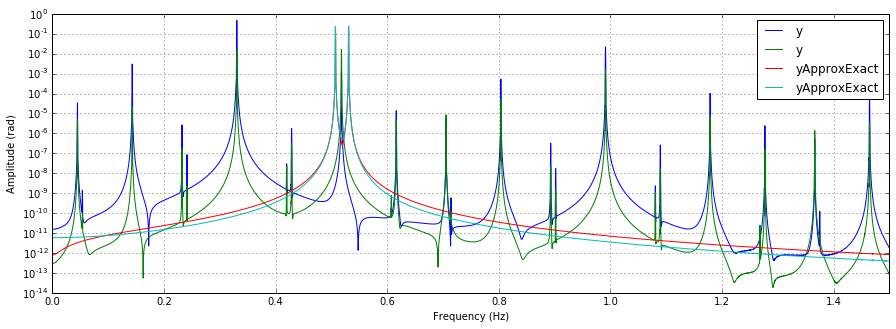

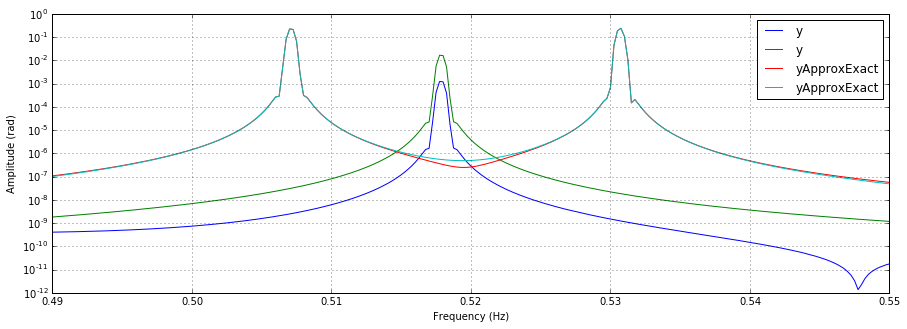

In [7]:
yFft = fft(y)
yApproxExactFft = fft(yApproxExact)

plot.semilogy(freq, yFft, label = "y")
plot.semilogy(freq, yApproxExactFft, label = "yApproxExact")
plot.xlabel("Frequency (Hz)")
plot.ylabel("Amplitude (rad)")
plot.grid()
plot.legend()
plot.show()

plot.semilogy(freq, yFft, label = "y")
plot.semilogy(freq, yApproxExactFft, label = "yApproxExact")
plot.xlabel("Frequency (Hz)")
plot.ylabel("Amplitude (rad)")
plot.xlim((0, 1.5))
plot.ylim((1e-14, 1))
plot.grid()
plot.legend()
plot.show()

plot.semilogy(freq, yFft, label = "y")
plot.semilogy(freq, yApproxExactFft, label = "yApproxExact")
plot.xlabel("Frequency (Hz)")
plot.ylabel("Amplitude (rad)")
plot.xlim((0.49, 0.55))
plot.ylim((1e-12, 1))
plot.grid()
plot.legend()
plot.show()

The frequency content is even more complex than before, with peaks scattered everywhere, indicating the waveform is even less sinusoidal. However, notably both pendula contain the same peak frequencies, just at different amplitudes, with one pendulum having consistently more amplitude than the other, as our displacement waveform shows. Except one frequency (and its even harmonics), where the other pendula has more amplitude in, around $518 \:\mathrm{mHz}$.

### The Unstable Equilibrium
Let's consider the case where ${\phi_1}_0 = \pi$ where everything else is as before. This is where one pendulum is completely upside-down while the other isn't. The original ODE can now be solved exactly to yield $\phi_1 = \pi$ and $\phi_2 = 0$ for all $t$. But how does our numerical solver fare? We are now well outside the realm of the small angle approximation, so it is completely ignored here.

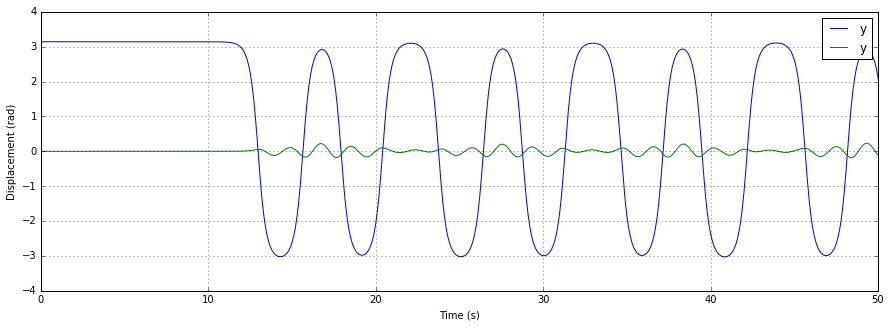

In [8]:
phi0 = (scipy.constants.pi, 0)

y = [(y[0], y[1]) for y in scipy.integrate.odeint(f, phi0 + (0, 0), t, rtol = 0, atol = 1e-12)]

plot.plot(t, y, label = "y")
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.xlim((0, 50))
plot.grid()
plot.legend()
plot.show()

Our solver still believes the solution to be oscillatory even though it isn't. This is likely due to the numerical inaccuracy in $\pi$, the functions, and the solver, nudging the pendulum out of its equilibrium state. This is one of the inherent weaknesses of numerical solvers.

In fact, I believe this is known as a "stiff" system, where numerical solvers perform badly in in general.

### Loop the Loop
We have be using an initial velocity of 0 for all the above systems. What if it isn't 0? What if it's enough for the pendulum to go spinning around its axis?

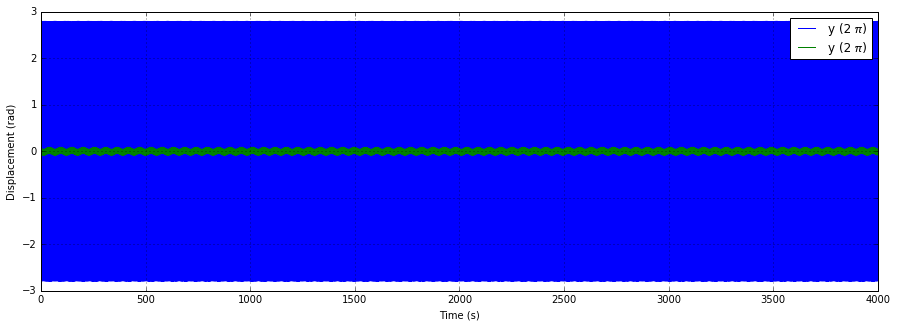

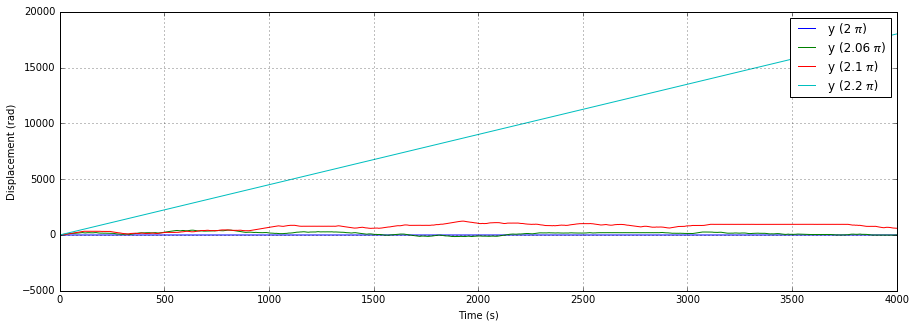

In [9]:
phi0 = (0, 0)

pi = scipy.constants.pi
y_2 = [(y[0], y[1]) for y in scipy.integrate.odeint(f, phi0 + (2 * pi, 0), t)]
y_2_06 = [y[0] for y in scipy.integrate.odeint(f, phi0 + (2.06 * pi, 0), t)]
y_2_1 = [y[0] for y in scipy.integrate.odeint(f, phi0 + (2.1 * pi, 0), t)]
y_2_2 = [y[0] for y in scipy.integrate.odeint(f, phi0 + (2.2 * pi, 0), t)]

plot.plot(t, y_2, label = "y (2 π)")
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.grid()
plot.legend()
plot.show()

y_2 = [y_[0] for y_ in y_2]

plot.plot(t, y_2, label = "y (2 π)")
plot.plot(t, y_2_06, label = "y (2.06 π)")
plot.plot(t, y_2_1, label = "y (2.1 π)")
plot.plot(t, y_2_2, label = "y (2.2 π)")
plot.xlabel("Time (s)")
plot.ylabel("Displacement (rad)")
plot.grid()
plot.legend()
plot.show()

As one would expect, with a large enough initial velocity, the pendulum shoots off in one direction. However, when it has "just" enough, it's behaviour is more chaotic, sometimes going clockwise and sometimes anticlockwise. This is likely due to the stiffness of the system at the critical $\phi = \pi + 2 k \pi$ points, and would not exhibit this behaviour in "real life".